# Week 4: Lab Work - Regression Model Development and Evaluation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# Import the libraries required, for example: import seaborn as sns

import seaborn as sns
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn.metrics import r2_score

## Load ‘tips’ data set from seaborn library

In [6]:
# Load the dataset "tips" from seaborn package using sns object.
# data = pd.read_csv('datasets/housing.csv')
data = sns.load_dataset('tips')

In [3]:
# Print the head of the dataset to have an idea.

print(f"Data Head\n{data.head()}")
print(f"\nData Index\n{data.index}")
print(f"\nData Columns\n{data.columns}")
# print(tips.head())

Data Head
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Data Index
RangeIndex(start=0, stop=244, step=1)

Data Columns
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [4]:
# Check the size of the dataset
data.shape

(244, 7)

In [5]:
# Check the variables/columns and the data types and see if we can predict tips using total_bill for example? You can use info()
data.info(verbose=True)
# tips.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## <font color='red'>Objective</font>: Using Linear Regression Algorithm, we aim to predict tips on the basis of total bill.

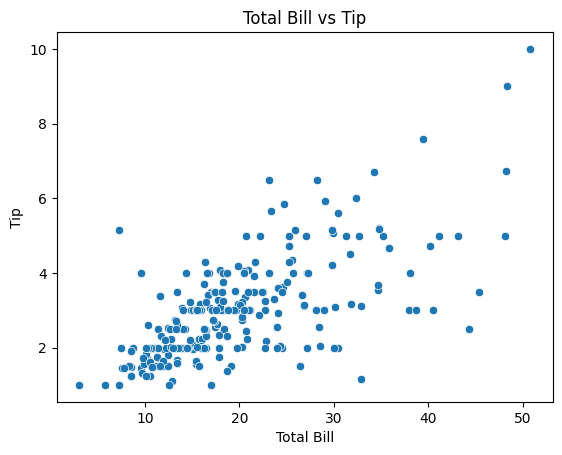

In [6]:
# Can you plot a scatterplot below to see whether total bill tends to proprotionally increase with the tip?
# This way we can be sure to use 'total_bill' feature to predict 'tip' target value by observing the correlation.

sns.scatterplot(x='total_bill', y='tip', data=data)

plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip')

plt.show()

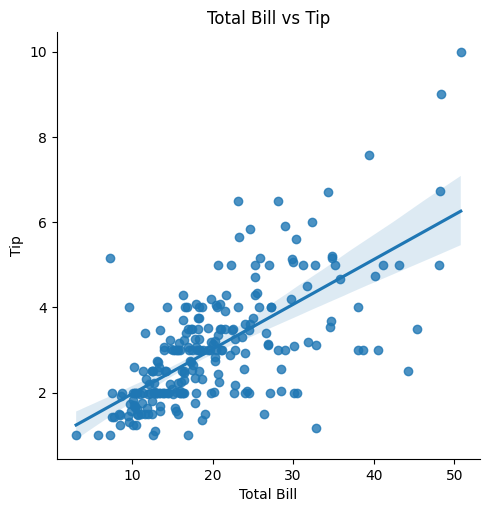

In [7]:
# Consider using regplot() or lmplot function to see this trend much clearly.


sns.lmplot(x='total_bill', y='tip', data=data)

# Add labels and title
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip')

# Show the plot
plt.show()

# Model Development

## Divide the dataset into two parts, X for total_bill features/predictors, y for tip target value.

In [7]:
# Write HERE

# Better to define features as a dataframe [[]]
# Predicted value can be defined as series []
# The target variable (y) is often defined as a Series because it represents a single column of values corresponding to the output labels or
# regression targets. Machine learning models are generally fine with the target variable being in a one-dimensional format.
# Since y only holds the target values, there's no need to keep it in a 2D DataFrame format, e.g. (244,1).

# Define the feature as a DataFrame
X = data[['total_bill']]

# Define the target value as a Series
y = data['tip']

# Display the first few rows of X and y
print(X.head())
print(y.head())

   total_bill
0       16.99
1       10.34
2       21.01
3       23.68
4       24.59
0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64


# Train-Test Split
- Train-test split is a technique used in machine learning to evaluate the performance of a model on unseen data. It is used to split the data into two parts: a training set and a test set. The training set is used to train the model, while the test set is used to evaluate the model’s performance on unseen data. This helps to ensure that the model is not overfitting the data, and that it is generalizing well to unseen data.

In [8]:
#Split the data into training and test sets using train_test_split. Spare 80% for training set and 20% for the test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# You can check the size of each variables: X_train, X_test, y_train, y_test whether they match in size using data.shape

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'Data shape: {data.shape}')

X_train shape: (195, 1)
X_test shape: (49, 1)
y_train shape: (195,)
y_test shape: (49,)
Data shape: (244, 7)


Intercept: 0.9252355585570546
Coefficient: 0.10696370685268666


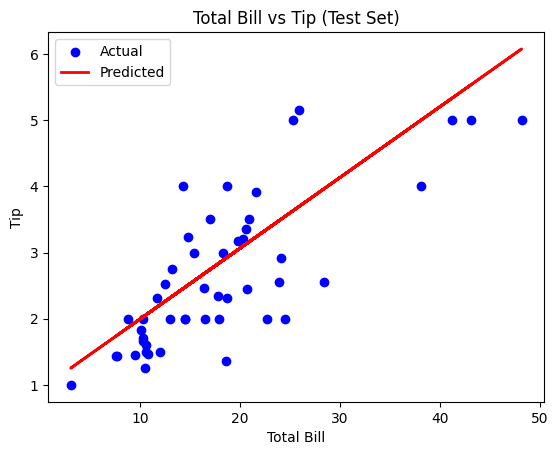

In [9]:
# Define Linear Regression model
# Write your code HERE

## General approach
# 1- Identify and allocate X and y, features and the target value.
# 2- Split the dataset into X_train, X_test, y_train, y_test.
# 3- Determine the model - whether it is linear regression/random forest etc. you want to use?

# 4- Fit the data - train X_train with y_train so as to teach the model the correlation between X and y.
# 4th step is done so that Beta values are estimated, which can then be used to estimate the y values on a new unseen data (X_test in our case).

model = LinearRegression()

model.fit(X_train, y_train)

# Display the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')

# Predict the y values for the test set
y_pred = model.predict(X_test)

# Plot the regression line with the test data
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip (Test Set)')
plt.legend()
plt.show()


In [13]:
# Fit the model to the given data, X_train is fitted with weights (Beta values from in-class slides) to the value y_train, using fit() function

# Define the Linear Regression model
model = LinearRegression()

# Fit the model on the training data (X_train and y_train)
model.fit(X_train, y_train)

# Print the estimated Beta values (coefficients)
print(f"Model coefficients (Beta): {model.coef_}")
print(f"Intercept: {model.intercept_}")

Model coefficients (Beta): [0.10696371]
Intercept: 0.9252355585570546


Intercept: 0.9252355585570546
Coefficient: 0.10696370685268666


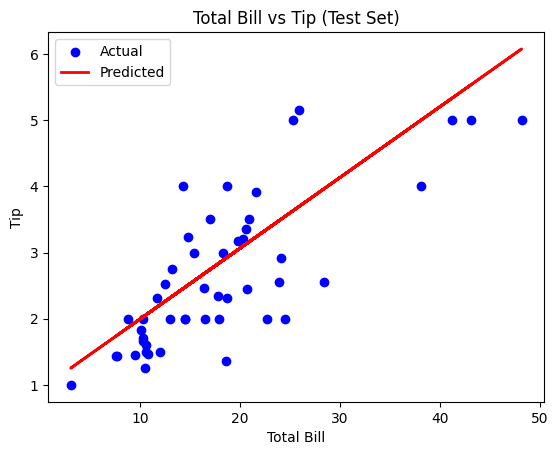

In [14]:
# Make prediction using the unseen X_test data using predict() function

# Display the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')

# Predict the y values for the test set
y_pred = model.predict(X_test)

# Plot the regression line with the test data
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip (Test Set)')
plt.legend()
plt.show()

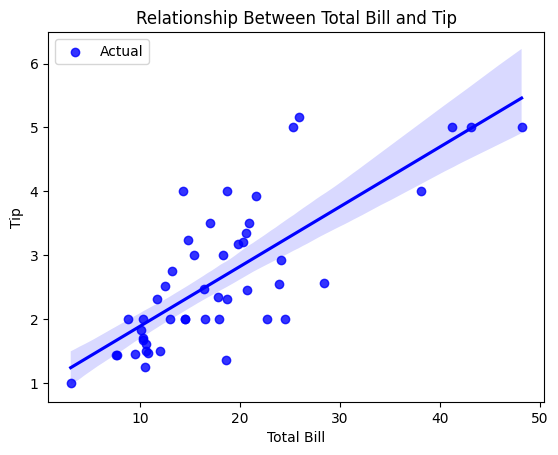

In [15]:
# Plot the true data points of X_test and y_test using regplot

sns.regplot(x=X_test['total_bill'], y=y_test, color='blue', label='Actual')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Relationship Between Total Bill and Tip')
plt.legend()
plt.show()


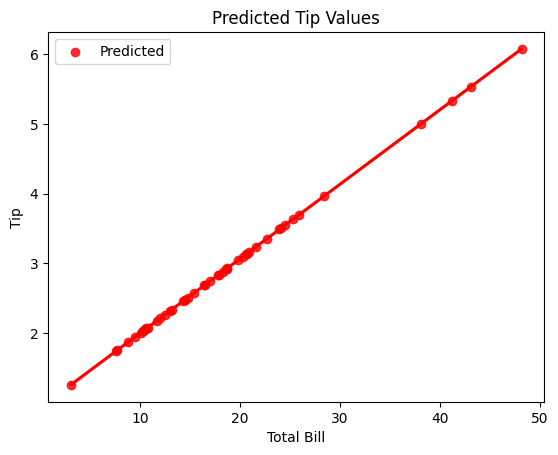

In [16]:
# Plot the predicted target value 'tip', you can use regplot

sns.regplot(x=X_test['total_bill'], y=y_pred, color='red', label='Predicted')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Predicted Tip Values')
plt.legend()
plt.show()


Intercept: 0.9252355585570546
Coefficient: 0.10696370685268666
Mean Absolute Error: 0.6208580000398983


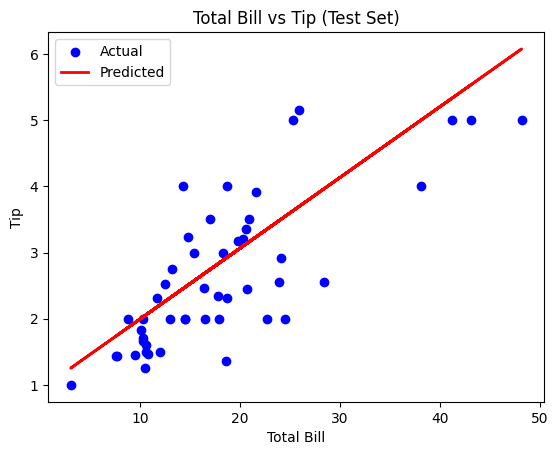

In [17]:
# Use MAE to measure the average magnitude of the errors in a set of predictions.
# Closer to zero means better accuracy.
# from sklearn.metrics import mean_absolute_error

# 2. Split the dataset into X_train, X_test, y_train, y_test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Determine the model - use linear regression
# model = LinearRegression()

# 4. Fit the data - train X_train with y_train
# model.fit(X_train, y_train)

# Display the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')

# Predict the y values for the test set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Plot the regression line with the test data
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip (Test Set)')
plt.legend()
plt.show()

In [10]:
# Use RMSE to measure the average of the suares of the errors or deviations from the actual value.
# It is used to measure the accuracy of a model in predicting the outcome of a given data set.
# Closer to zero means better accuracy.

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 0.7541977545199626


In [13]:
# Extra information on evaluation of regression, search for 'R^2 score' and implement.
# Closer to one means better accuracy.


# Compute R² Score
r2 = r2_score(y_test, y_pred)

print(f'R² Score: {r2}')

R² Score: 0.5449381659234663


In [16]:
# Print y_prediction vs y_test side-by-side to visibly compare.

# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})

# Display the comparison table
# print(comparison_df) 
display(comparison_df)

,Actual,Predicted
0,3.18,3.045256
1,2.00,1.863307
2,2.00,3.551195
3,5.16,3.694526
4,2.00,2.315764
5,2.00,2.838816
6,2.56,3.967283
7,2.52,2.260143
8,3.23,2.506159
9,3.00,2.570337


In [17]:
# Define a new function that calculates the mean absolute error from y_test to y_predictions using the function name: mean_abs_err()

def mean_abs_err(y_test, y_pred):
    """
    Calculate the Mean Absolute Error (MAE) between actual and predicted values.

    Parameters:
    y_test (array-like): Actual target values.
    y_pred (array-like): Predicted values.

    Returns:
    float: Mean Absolute Error (MAE)
    """
    return mean_absolute_error(y_test, y_pred)

In [22]:
# Call the above function, as follows, with the y_test and y_predictions, and compare to the embedded mean_squared_error function outcome we used above. We expect them to be the same!
# mean_abs_err(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_abs_err(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Error (MAE): 0.6208580000398983
Mean Squared Error (MSE): 0.5688142529229538


## Challenging task (optional)
*   **Predict housing prices**




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
# Some necessary ones are given below ....
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load dataset: housing.csv


# Step 1: Data Preprocessing
# Drop non-numeric columns


# Handle missing values by filling with median if any




In [ ]:
# Step 2: Exploratory Data Analysis (EDA)
# Compute and visualize the correlation matrix




In [ ]:
# Step 3: Feature Selection Using Variance Inflation Factor (VIF) (Multicollinearity Handling)
# Search for VIF and understand the context before using it
# Write a function to calculate VIF for each feature using variance_inflation_factor function


# Call the aforementioned function to Compute VIF and see highly collinear features in the dataset


# Remove features with high multicollinearity, i.e., VIF > 30


In [ ]:
# Step 4: Splitting Data for Model Training, 'Price' is your target variable



In [ ]:
# Step 5: Training and Evaluating a Linear Regression Model
# Select and Train Linear Regression Model


# Predict using the model and X_test

## Model Evaluation using RMSE and R^2 and print the outputs using the following prints
# write HERE for the evaluation of RME and R^2

# print the output
print("\nLinear Regression Model Evaluation:")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")



In [ ]:
# Step 6: Search for Regularisation with Ridge and Lasso Regression and use them in this task to improve results and observe if it helps
# Play with alpha values and observe if there is any changes
# RIDGE

# LASSO

# print the output
print("\nRegularization Results:")
print(f"Ridge Regression - RMSE: {ridge_rmse:.3f}, R²: {ridge_r2:.3f}")
print(f"Lasso Regression - RMSE: {lasso_rmse:.3f}, R²: {lasso_r2:.3f}")



In [ ]:
# Step 7: Feature Importance
# Get feature importance using the Linear Regression coefficients and print



In [ ]:
# Step 8: Change VIF value from 30 to 50 at the end of Step 3 and observe/comment on your findings.
# How did this change affect the selected features and the model performance?